#Advanced Net

# Приклади роботи в Open CV

In [1]:
pip install opencv-python

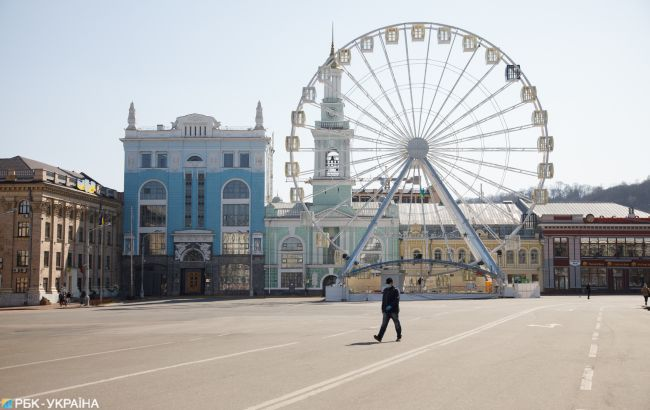

Shape of the image: (410, 650, 3)


In [2]:
from google.colab.patches import cv2_imshow
import cv2

# Завантаження зображення
image = cv2.imread("/content/podil.jpg")

# Відображення зображення в Colab
cv2_imshow(image)

# Якщо необхідно, можна перевірити розміри зображення
print("Shape of the image:", image.shape)

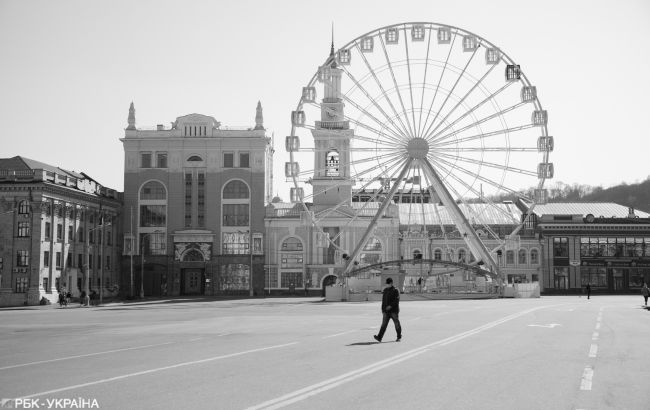

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

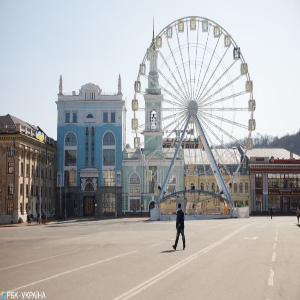

In [4]:
resized_image = cv2.resize(image, (300, 300))  # Новий розмір 300x300
cv2_imshow(resized_image)

In [5]:
cv2.imwrite("processed_image.jpg", resized_image)  # Зберегти оброблене зображення

True

Pixel value at (50, 50): [230 214 201]


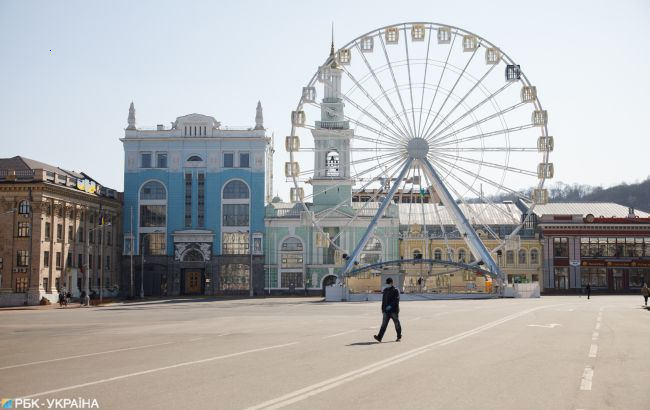

In [6]:
import numpy as np

# Отримати значення пікселя (x, y)
x, y = 50, 50
pixel_value = image[y, x]  # Пам'ятайте, що координати у форматі (y, x)
print("Pixel value at (50, 50):", pixel_value)

# Змінити значення пікселя
image[y, x] = [255, 0, 0]  # Установити червоний колір
cv2_imshow(image)

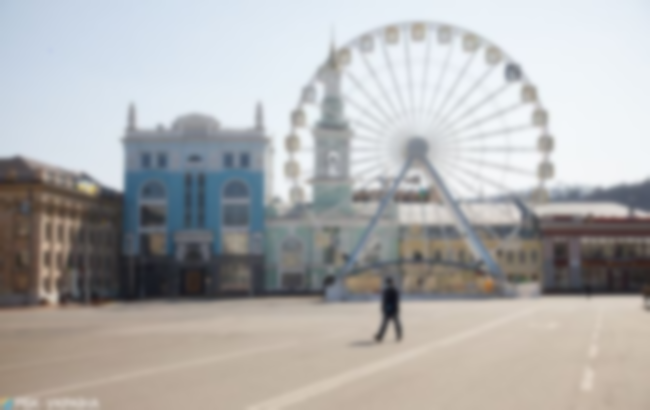

In [7]:
#Застосування фільтрів (приклад: розмиття)
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)  # Розмиття з ядром 15x15
cv2_imshow(blurred_image)

#GLIDE

In [8]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/glide-text2im


Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
  Cloning https://github.com/openai/glide-text2im to /tmp/pip-req-build-b6qo9479
  Running command git clone --filter=blob:none --quiet https://github.com/openai/glide-text2im /tmp/pip-req-build-b6qo9479
  Resolved https://github.com/openai/glide-text2im to commit 69b530740eb6cef69442d6180579ef5ba9ef063e
  Preparing metadata (setup.py) ... done
  Created wheel for glide-text2im: filename=glide_text2im-0.0.0-py3-none-any.whl size=1953624 sha256=96ea9605ba6fa5c5cd35a5f924501dcc753afe659996eacd46260018d0649d82
  Stored in directory: /tmp/pip-ephem-wheel-cache-9wtd2nyw/wheels/88/21/5e/57cab1c1078317022fe11d86e1596fdaa12260531220ac0c99
Successfully built glide-text2im


In [9]:
!pip install git+https://github.com/openai/glide-text2im

  Cloning https://github.com/openai/glide-text2im to /tmp/pip-req-build-6pw7ffj2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/glide-text2im /tmp/pip-req-build-6pw7ffj2
  Resolved https://github.com/openai/glide-text2im to commit 69b530740eb6cef69442d6180579ef5ba9ef063e
  Preparing metadata (setup.py) ... done


In [10]:
import torch
import ftfy
import regex
import tqdm
from glide_text2im.model_creation import create_model_and_diffusion

print("Все пакети встановлені правильно.")

Все пакети встановлені правильно.


In [11]:
from glide_text2im.model_creation import create_model_and_diffusion

# Параметри для створення моделі
options = {
    'image_size': 64,  # Розмір зображення
    'num_channels': 192,
    'num_res_blocks': 2,
    'channel_mult': "1,2,3,4",  # Передаємо як рядок
    'num_heads': 4,
    'num_head_channels': 64,
    'num_heads_upsample': -1,
    'attention_resolutions': "32,16,8",  # Передаємо як рядок
    'dropout': 0.1,
    'text_ctx': 128,
    'xf_width': 512,
    'xf_layers': 16,
    'xf_heads': 8,
    'xf_final_ln': True,
    'xf_padding': True,
    'diffusion_steps': 1000,
    'noise_schedule': 'linear',
    'use_scale_shift_norm': True,
    'resblock_updown': True,
    'cache_text_emb': True,
    'inpaint': False,
    'super_res': False,
}

# Додаємо відсутні параметри
timestep_respacing = '100'
use_fp16 = torch.cuda.is_available()

# Створення моделі та дифузії
model, diffusion = create_model_and_diffusion(
    timestep_respacing=timestep_respacing,
    use_fp16=use_fp16,
    **options
)
model.eval()

# Використання GPU, якщо доступно
if torch.cuda.is_available():
    model = model.half().cuda()

print("Модель створена успішно.")

Модель створена успішно.


In [12]:
torch.save(model.state_dict(), "glide_model_saved.pt")
print("Модель збережена як glide_model_saved.pt")

Модель збережена як glide_model_saved.pt


In [15]:
import torch

if torch.cuda.is_available():
    print("GPU доступний.")
else:
    print("GPU недоступний. Перевірте налаштування апаратного забезпечення.")

GPU доступний.


In [50]:
import torch

# Завантаження ваг моделі
model_path = "glide_model_saved.pt"
state_dict = torch.load(model_path, map_location='cuda' if torch.cuda.is_available() else 'cpu')
model.load_state_dict(state_dict)

print("Ваги моделі завантажено успішно.")

<ipython-input-50-fceb5c3bd43a>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location='cuda' if torch.cuda.is_available() else 'c

Ваги моделі завантажено успішно.


In [55]:
# Переведення моделі до Float32
model = model.float()

# Приведення всіх шарів LayerNorm до Float32
for name, module in model.named_modules():
    if isinstance(module, torch.nn.LayerNorm):
        module.to(dtype=torch.float32)

# Перевірка після оновлення
for name, param in model.named_parameters():
    print(f"{name}: {param.dtype}")

# Генерація зображення (з вашого коду)
prompt = "a futuristic cityscape at sunset"
tokens = model.tokenizer.encode(prompt)
tokens, mask = model.tokenizer.padded_tokens_and_mask(tokens, model.text_ctx)

model_kwargs = dict(
    tokens=torch.tensor([tokens], dtype=torch.long, device='cuda'),
    mask=torch.tensor([mask], dtype=torch.bool, device='cuda'),
)

samples = diffusion.p_sample_loop(
    model,
    (1, 3, options['image_size'], options['image_size']),
    clip_denoised=True,
    model_kwargs=model_kwargs,
    device='cuda',
)

# Конвертація в зображення
image = (samples[0].permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8)
img = Image.fromarray(image)
img.show()


positional_embedding: torch.float32
padding_embedding: torch.float32
time_embed.0.weight: torch.float32
time_embed.0.bias: torch.float32
time_embed.2.weight: torch.float32
time_embed.2.bias: torch.float32
input_blocks.0.0.weight: torch.float32
input_blocks.0.0.bias: torch.float32
input_blocks.1.0.in_layers.0.weight: torch.float32
input_blocks.1.0.in_layers.0.bias: torch.float32
input_blocks.1.0.in_layers.2.weight: torch.float32
input_blocks.1.0.in_layers.2.bias: torch.float32
input_blocks.1.0.emb_layers.1.weight: torch.float32
input_blocks.1.0.emb_layers.1.bias: torch.float32
input_blocks.1.0.out_layers.0.weight: torch.float32
input_blocks.1.0.out_layers.0.bias: torch.float32
input_blocks.1.0.out_layers.3.weight: torch.float32
input_blocks.1.0.out_layers.3.bias: torch.float32
input_blocks.2.0.in_layers.0.weight: torch.float32
input_blocks.2.0.in_layers.0.bias: torch.float32
input_blocks.2.0.in_layers.2.weight: torch.float32
input_blocks.2.0.in_layers.2.bias: torch.float32
input_blocks.

RuntimeError: mat1 and mat2 must have the same dtype, but got Half and Float